Epoch [0/2000], Loss: 35.512341
Epoch [200/2000], Loss: 4.458535
Epoch [400/2000], Loss: 0.621404
Epoch [600/2000], Loss: 0.481109
Epoch [800/2000], Loss: 0.400484
Epoch [1000/2000], Loss: 0.392664
Epoch [1200/2000], Loss: 0.392655
Epoch [1400/2000], Loss: 0.392655
Epoch [1600/2000], Loss: 0.392696
Epoch [1800/2000], Loss: 0.393004
Test Loss: 0.446217


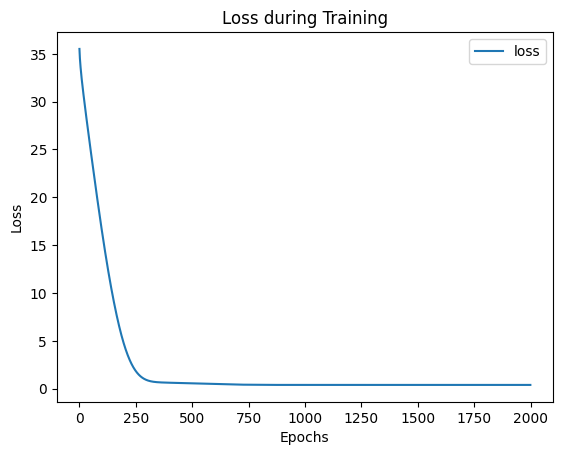

Prediction: 9.6672945022583


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = {'input': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'output': [2, 4, 5, 4, 5, 7, 8, 9, 10, 11]}
dataset = pd.DataFrame(data)

X = dataset[['input']].values
y = dataset[['output']].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)

        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)



def train_model(model, X_train, y_train, criterion, optimizer, epochs=2000):

    for epoch in range(epochs):
        optimizer.zero_grad()

        output = model(X_train)
        loss = criterion(output, y_train)

        loss.backward()
        optimizer.step()

        model.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")



train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)



with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f"Test Loss: {test_loss.item():.6f}")



loss_df = pd.DataFrame(ai_brain.history)

loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


X_new = torch.tensor([[9]], dtype=torch.float32)

X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

prediction = ai_brain(X_new_tensor).item()

print(f"Prediction: {prediction}")

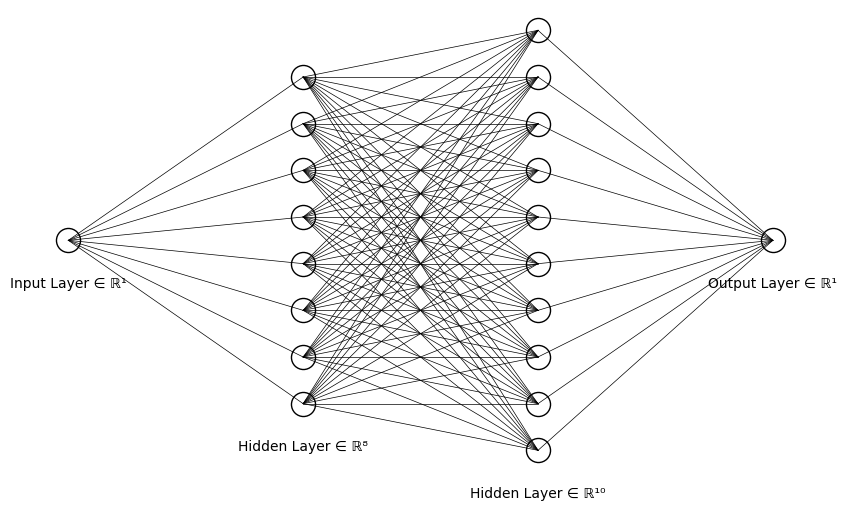

In [4]:
import matplotlib.pyplot as plt

layers = [1, 8, 10, 1]
layer_names = [
    "Input Layer ∈ ℝ¹",
    "Hidden Layer ∈ ℝ⁸",
    "Hidden Layer ∈ ℝ¹⁰",
    "Output Layer ∈ ℝ¹"
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

x_spacing = 2
y_spacing = 1.2

positions = []

for i, layer_size in enumerate(layers):
    x = i * x_spacing
    y_offset = (layer_size - 1) * y_spacing / 2
    layer_positions = []

    for j in range(layer_size):
        y = -j * y_spacing + y_offset
        ax.scatter(x, y, s=300, facecolors='white', edgecolors='black')
        layer_positions.append((x, y))

    ax.text(x, -y_offset - 1.2, layer_names[i],
            ha='center', fontsize=10)
    positions.append(layer_positions)

for i in range(len(positions) - 1):
    for (x1, y1) in positions[i]:
        for (x2, y2) in positions[i + 1]:
            ax.plot([x1, x2], [y1, y2], color='black', linewidth=0.5)

plt.show()